# Machine Learning Basics

## with sklearn


>    - Simple and efficient tools for predictive data analysis
>    - Accessible to everybody, and reusable in various contexts
>    - Built on NumPy, SciPy, and matplotlib
>    - Open source, commercially usable - BSD license
>    -- <cite>[https://scikit-learn.org/](https://scikit-learn.org/stable/)</cite>

In [2]:
import pip
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


## Machine Learning
A learning problem considers a data sample and then tries to predict properties of previously unknown data.

The three main categories of learning problems are:
- **Supervised learning**: the data has an additional attribute ("label") that we want to predict $\rightarrow$ classification or regression
- **Unsupervised learning**: the data has no target value, we want to identify groups of similar samples $\rightarrow$ clustering
- **Reinforcement learning**: no data available, by interacting with an environment and correspondig reactions a system is trained

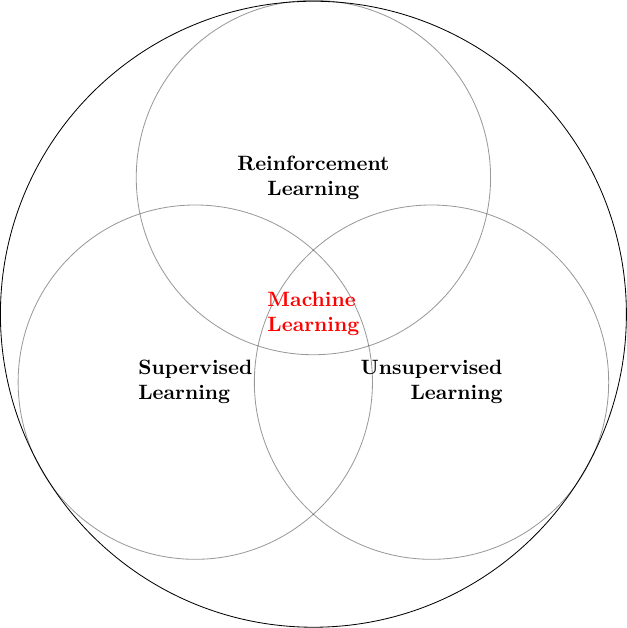

![Data Science Lifecycle](https://ajgoldsteindotcom.files.wordpress.com/2017/11/ds-deconstructed.jpg?w=740)

## A Sample ML Project

![Titanic Image](https://miro.medium.com/max/720/1*qTqs-DD_i5dqUtTuaVzfWw.png)

## Data Dictionary
| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |  fractional if less than 1                     |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |  definition of family on board                 |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |


For more information, please be refered to the dataset description on [kaggle.com](https://www.kaggle.com/c/titanic/data).


### 01. Frame the Problem

> Ask a Lot of Questions
> - Translate ambigous requests into a  concrete, well-defined problem
> - Identify business priorities & strategy decisions that will influence your work

__Requirement / Task:__ We are given information about the passengers of the Titanic (e.g. gender, age, ticket category) and want to predict who survived the tragedy.

<a name="2"></a>
### 02. Collect Raw Data

> Identify All Available Datasets
> - Web, internal/external databases, etc.
>
> Extract Data into Usable Format
> - .csv, .json, .xml, etc.

__Task:__ Load Data

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ADSLab-Salzburg/DataAnalysiswithPython/main/data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a name="3"></a>
### 03. Process the Data

> Examine the Data at a High-Level
> - Understand every column, identify errors, missing values & corrupt records
>
> Clean the data
> - Throw away, replace, and/or filter corrupt / error prone / missing values

__Task:__ We need to understand what the columns mean and probably clean the data.

#### Is the PassengerID consecutive?

In [4]:
df.tail() # ID and pandas index agree...

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### Do we know the survival status for each passenger?

In [5]:
# isna() returns a boolean value -> sum > 0 would mean we have NaNs
df['Survived'].isna().sum()

0

#### How many passenger classes are there?

In [6]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### Do we know the name, gender and age of each passenger?

Check if name column contains NaNs.

In [14]:
# YOUR CODE HERE
df['Name'].isna().sum()

0

#### How to handle NaN values?
- remove row
- remove feature (=column)
- replace
  - mean
  - median
  - zero (min)
  - max

In [15]:
# replace NaNs
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
df.loc[df['Age'].isna(), 'Age'] = df['Age'].mean()
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

#### What is the age distribution of the passengers?

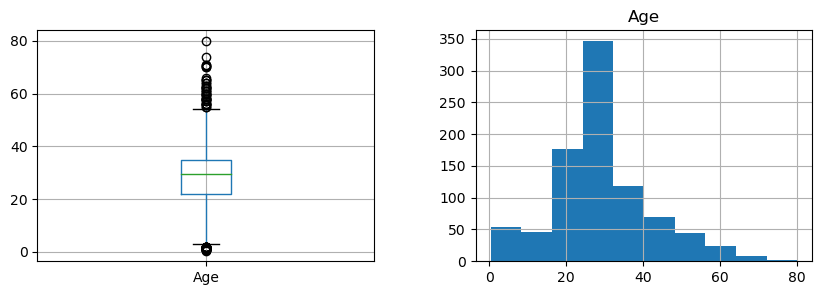

In [17]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,3))
df.boxplot(column='Age', ax=ax1)
df.hist(column='Age', ax=ax2)
plt.show()

#### How many passengers had siblings/spouses on board the Titanic?

In [18]:
# SibSp gives the number of siblings/spouses
df['SibSp'].sum()

466

In [19]:
df['SibSp'].astype(bool).sum()

283

#### How many passengers had parents/children on board the Titanic?

In [20]:
# Parch gives the number of parents/children
df['Parch'].astype(bool).sum()

213

#### How much did the passengers pay for their ticket on average?

In [21]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [22]:
df['Fare'].mean()

32.204207968574636

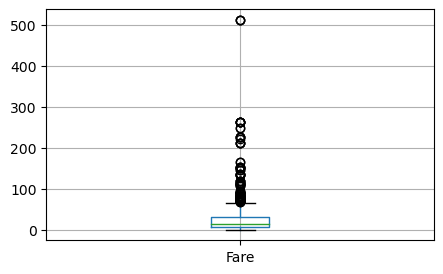

In [23]:
plt.figure(figsize=(5,3))
df.boxplot(column='Fare')
plt.show()

#### Where did the passengers embark?

In [24]:
df['Embarked'].value_counts()
# S = Southampton
# C = Cherbourg
# Q = Queenstown

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### Which features (=columns) are categorical, numerical etc.?

In [25]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<a name="4"></a>
### 04. Explore the Data
> Play around with the data
> - Split, segment & plot the data in different ways
>
> Identify Patterns & Extract Features
> - Use statistics to identify & test significant variables

__Task:__ Exploratory Data Analysis

#### What is the survival rate of men and women?

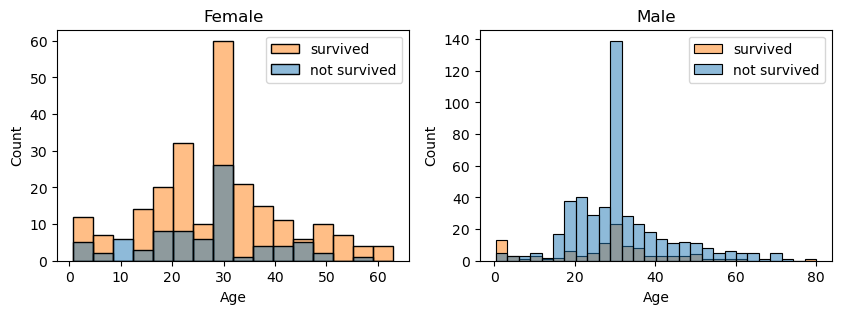

In [26]:
import seaborn as sns
# subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

women = df[df['Sex'] == 'female']
men = df[df['Sex'] == 'male']

# plot women
# sns.histplot(data=penguins, x="flipper_length_mm", hue="species")
sns.histplot(data=women, x="Age", ax=axes[0], hue="Survived")
axes[0].legend(labels=['survived', 'not survived'])
axes[0].set_title('Female')

# plot men
sns.histplot(data=men, x="Age", ax=axes[1], hue="Survived")
axes[1].legend(labels=['survived', 'not survived'], )
axes[1].set_title('Male')
plt.show()

#### Survival Rate by Ticket Price

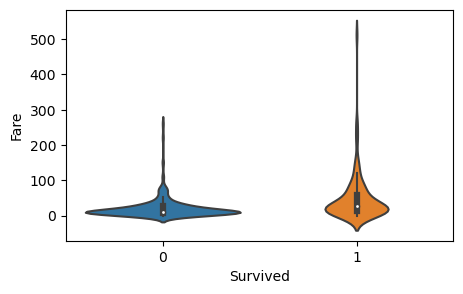

In [27]:
plt.figure(figsize=(5,3))
sns.violinplot(x="Survived", y="Fare", data=df)
plt.show()

### 05. Perform In-Depth Analysis

> Create a Predictive Model
> - Use feature vectors from step [#4](#4)
>
> Evaluate & Refine Model
> - Perhaps return to step [#2](#2), [3](#3), or [4](#4)

__Task:__ Build a Model

Given the training data for the binary classification problem "survival", we want to fit an estimator to be able to predict the class (0=not suvived, 1=survived) of previously unseen data (=test data).

In scikit-learn (sklearn), an estimator for classification is a Python object that implements the methods ``fit(X, y)`` and ``predict(T)``.

An example of an estimator is the ``DicisionTreeClassifier``, that learns simple dicision rules to classify the data. The estimator’s constructor takes as arguments the model’s parameters.

In [28]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

### Training set and testing set

Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the **training set**, on which we learn some properties. We call the other set the **testing set**, on which we test the learned properties.

In [29]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8)
df_train.shape

(712, 12)

In [30]:
df_test.shape

(179, 12)

**Let's get on training! Wait..**

In [31]:
clf.fit(df_train[['Sex', 'Pclass']], df_train['Survived'])  

ValueError: could not convert string to float: 'male'

**We need numeric features!**
Here we return to [#4](#4).

In [50]:
 # convert to categorical object and use codes instead of strings
df_train["Gender"] = df_train["Sex"].astype('category').cat.codes
df_test["Gender"] = df_test["Sex"].astype('category').cat.codes
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
515,516,0,1,"Walker, Mr. William Anderson",male,47.000000,0,0,36967,34.0208,D46,S,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0000,NaN,S,1
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.000000,1,0,STON/O2. 3101279,15.8500,NaN,S,1
557,558,0,1,"Robbins, Mr. Victor",male,29.699118,0,0,PC 17757,227.5250,NaN,C,1
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.000000,1,0,2659,14.4542,NaN,C,0


In [51]:
clf.fit(X=df_train[['Gender', 'Pclass']], y=df_train['Survived'])  

DecisionTreeClassifier(random_state=0)

### Predict on Test Data

In [52]:
from sklearn import tree
y_pred = clf.predict(X=df_test[['Gender', 'Pclass']])
y_pred[:10]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

#### Evaluation
Accuracy is a very simple measure to evalute the performance of the classifier on the test data. It gives you the number of correctly classified samples.

In [53]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(df_test['Survived'], y_pred)
print(f'The accuracy is {acc*100:.2f}%.')

The accuracy is 71.51%.


#### Evaluation
The decision tree classifier is quite special, as we can also visualize, literally, the decisions it makes:

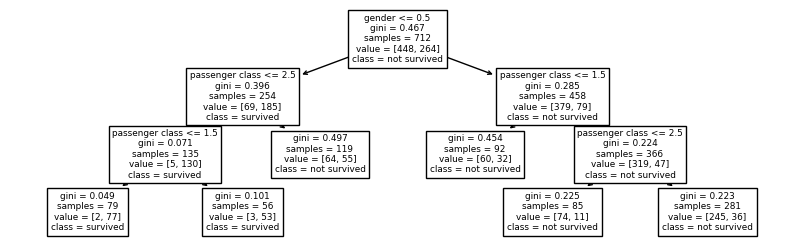

In [54]:
from sklearn import tree
plt.figure(figsize=(10,3)) # needed, that we can see the figure properly
tree.plot_tree(clf, feature_names=['gender', 'passenger class'], class_names=['not survived', 'survived'])
plt.show()

#### Confusion plot
A more in-depth analysis is possible with a so called confusion matrix:

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_test['Survived'], y_pred)
cm

array([[97,  4],
       [47, 31]], dtype=int64)

### 06. Communicate Results

> Identify Business Insights
> - Return back to the business problem
>
> Visualize your findings
> - keep it simple & priority-driven
>
> Tell a Clear & Actionable Story
> - Effectively communicate to non-technical audiences

__Task:__ Visualize the Results

At least, plot the confusion matrix so that it is more interpretable.

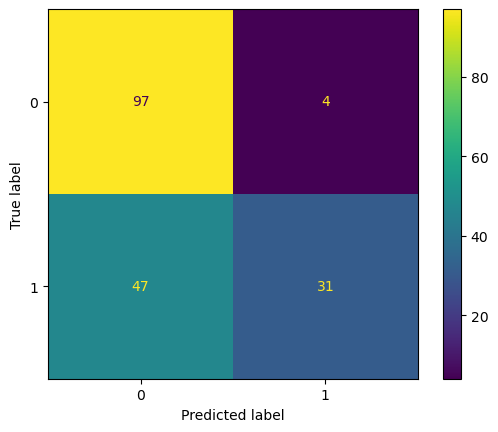

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Wrap-up Exercises

1. Draw a plot showing the number of men and women who survived and did not survive (bar plot) on the test data only.

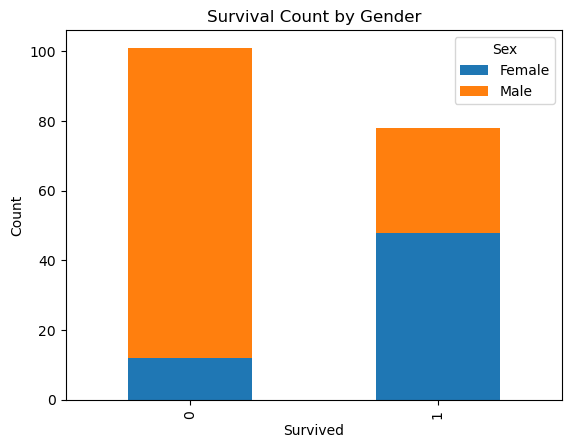

In [62]:
# YOUR CODE HERE

survival_counts = df_test.groupby(['Survived', 'Sex']).size().unstack()
survival_counts.plot(kind='bar', stacked=True)

plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Gender')
plt.legend(title='Sex', labels=['Female', 'Male'])

plt.show()

2. Create a simple "classifier": Compute the accuracy score if all women would have been predicted as having survived, and men as not. $\rightarrow$ You can use the column "Gender" as ``y_pred``, directly.

In [60]:
# YOUR CODE HERE

y_pred = df['Sex'].apply(lambda x: 1 if x == 'female' else 0)
y_true = df['Survived']
accuracy = accuracy_score(y_true, y_pred)
print(f'The accuracy is {accuracy*100:.2f}%.')

The accuracy is 78.68%.


3. Add more columns (e.g. ``Age``) to train the decision tree classifier and check if the performance improves. What happens to the graphical output of the tree?

In [65]:
# YOUR CODE HERE
clf.fit(X=df_train[['Gender', 'Pclass','Age']], y=df_train['Survived'])
y_pred = clf.predict(X=df_test[['Gender', 'Pclass', 'Age']])
acc = accuracy_score(df_test['Survived'], y_pred)
print(f'The accuracy is {acc*100:.2f}%.')


The accuracy is 74.86%.


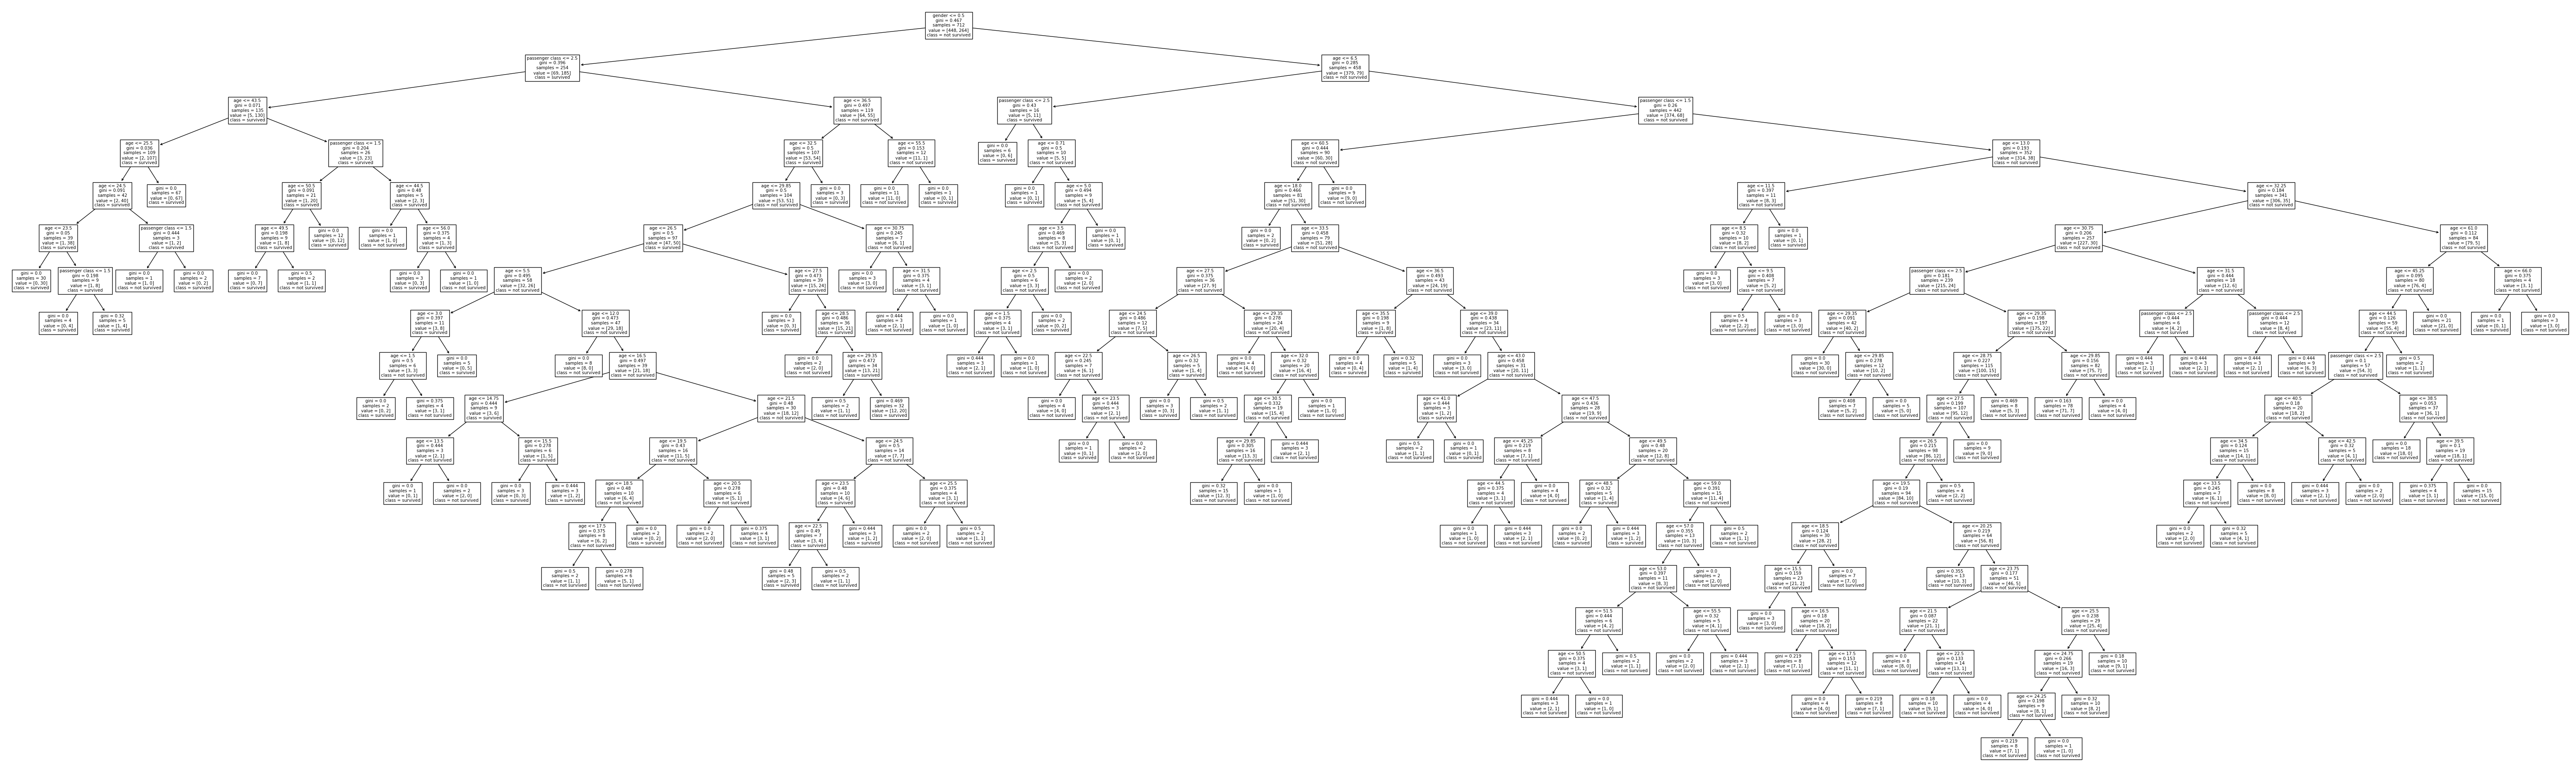

In [67]:
plt.figure(figsize=(80,24)) # needed, that we can see the figure properly
tree.plot_tree(clf, feature_names=['gender', 'passenger class', 'age'], class_names=['not survived', 'survived'])
plt.show()

## Further Reading
- [scikit-learn documentation](https://scikit-learn.org/stable/modules/classes.html#)

and see below:

[<img src="https://cloud.google.com/products/ai/ml-comic-1/assets/panel_01_2x.png" width=500>](https://cloud.google.com/products/ai/ml-comic-1/)